<a href="https://colab.research.google.com/github/cboyda/MachineLearning/blob/main/Capstone_Team1_W23_merged_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Capstone**

Team member names:

*  Brett Adams
*  Cailenys Leslie
*  Clinton Boyda 
*  Ram Dershan
*  Tanvir Hossain

Dataset: 
[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) plus additional dataset for additional features

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from  sklearn import neighbors
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") # disable warnings when making remote calls

# **Load Dataset**

In [2]:
# Connect to Dataset

#original filename = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
#df = pd.read_csv(filename)

# load both data sets in
original = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
df_original = pd.read_csv(original)
additional = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/full_nyc_dataset_cleaned_table-1.csv"
df_additional = pd.read_csv(additional)

In [3]:
# Merge the two datasets with an inner join, validate that no duplicate id values exist for a one to one join

#Choice 1: original dataset
#df = df_original
# OR
df = pd.merge(df_original, df_additional, how = "inner", on = "id", validate="one_to_one", suffixes=("_original","_additional"))

df.shape

(16005, 22)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type_original', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'property_type', 'room_type_additional',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type_original,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,room_type_additional,accommodates,bathrooms_text,bedrooms,beds
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,2017-10-05,0.40,1,0,Private room in rental unit,Private room,2,NaN,1.0,1.0
2,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,2019-06-24,3.47,1,220,Private room in rental unit,Private room,2,1 bath,1.0,1.0
3,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,2017-07-21,0.99,1,0,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0
4,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,...,2019-06-24,1.34,3,314,Private room in townhouse,Private room,2,1.5 baths,1.0,1.0


# **Clean Merged Dataset**

In [6]:
# Check shape after dropping examples
df.shape

(16005, 22)

In [7]:
df = df.drop(df[(df['property_type'] == 'Cave') | (df['property_type'] == 'Boat') | 
                (df['property_type'] == 'Floor') | (df['property_type'] == 'Private room in farm stay') |
                (df['property_type'] == 'Entire villa') | (df['property_type'] == 'Private room in houseboat') |
                (df['property_type'] == 'Private room in villa') | (df['property_type'] == 'Private room in tent') |
                (df['property_type'] == 'Houseboat')].index)

In [8]:
# assess new value counts for property_type
df['property_type'].value_counts()

Entire rental unit                    6975
Private room in rental unit           5153
Private room in home                   844
Entire home                            513
Entire condo                           418
Private room in townhouse              352
Entire loft                            326
Entire townhouse                       297
Private room in condo                  180
Shared room in rental unit             178
Private room in loft                   149
Entire guest suite                     133
Entire serviced apartment               98
Room in boutique hotel                  68
Room in hotel                           56
Private room in guest suite             37
Entire place                            33
Room in serviced apartment              24
Entire guesthouse                       19
Shared room in loft                     19
Private room                            18
Private room in resort                  17
Private room in bed and breakfast       14
Shared room

In [9]:
# extract the numerical values from the bathroom_text column for consideration 
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Half-bath', 0.5, inplace=True)
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Shared half-bath', 0.5, inplace=True)
df['bathrooms_text'].mask(df['bathrooms_text'] == 'Private half-bath', 0.5, inplace=True)
df['bathrooms'] = df['bathrooms_text'].str.extract(r'\b([\d.]+)\b')

In [10]:
# let's look closer at the property_type values, perhaps this can be simplified
print(df['property_type'].unique())
print("Number of property_type unique values:",df['property_type'].nunique())

['Entire rental unit' 'Private room in rental unit'
 'Private room in townhouse' 'Entire guest suite' 'Entire loft'
 'Private room in home' 'Entire condo' 'Private room in condo'
 'Private room in loft' 'Entire home' 'Entire townhouse'
 'Private room in bed and breakfast' 'Entire guesthouse'
 'Private room in guest suite' 'Room in boutique hotel'
 'Shared room in rental unit' 'Shared room in home' 'Private room'
 'Entire place' 'Entire serviced apartment' 'Private room in guesthouse'
 'Room in serviced apartment' 'Entire cottage' 'Shared room in loft'
 'Private room in serviced apartment' 'Entire bungalow' 'Room in hotel'
 'Shared room in townhouse' 'Private room in hostel'
 'Private room in bungalow' 'Shared room in condo'
 'Private room in resort' 'Shared room in floor' 'Private room in floor'
 'Tiny home' 'Entire home/apt' 'Shared room in guest suite'
 'Room in resort' 'Room in aparthotel' 'Shared room in guesthouse'
 'Room in bed and breakfast']
Number of property_type unique value

In [11]:
df['property_type'] = df.property_type.str.replace(r'(^.*Private room.*$)', 'Private Room')
#df.property_type.replace(['Private room in rental unit', 'female'], [1, 0], inplace=True)
#replace_property_values = {'Small' : 1, 'Medium' : 2, 'High' : 3 }
#replace_property_values = df.loc[df['property_type'].str.contains('Private room', case=False), 'property_type'] = 'Private Room'

In [12]:
df['property_type'] = df.property_type.str.replace(r'(^.*Entire.*$)', 'Entire Unit')

In [13]:
df['property_type'] = df.property_type.str.replace(r'(^.*Shared room.*$)', 'Shared Room')

In [14]:
df['property_type'] = df.property_type.str.replace(r'(^.*Room in.*$)', 'Room In')

In [15]:
df['property_type'].value_counts()

Entire Unit     8826
Private Room    6780
Shared Room      220
Room In          154
Tiny home          6
Name: property_type, dtype: int64

In [16]:
print(df['property_type'].unique())
print("Number of property_type unique values:",df['property_type'].nunique())

['Entire Unit' 'Private Room' 'Room In' 'Shared Room' 'Tiny home']
Number of property_type unique values: 5


In [17]:
# Convert bathroom to float type
df['bathrooms'] = df['bathrooms'].astype(float)

In [18]:
# drop bathroom_text, beds, and duplicated room_type column
df.drop(['bathrooms_text', 'room_type_additional', 'beds'], axis = 1, inplace = True)

In [19]:
# drop suffix from room_type_original
df = df.rename(columns = {'room_type_original' : 'room_type'})

In [20]:
df['room_type'].value_counts()

Entire home/apt    8803
Private room       6963
Shared room         220
Name: room_type, dtype: int64

For bedrooms and bathrooms with null values, fill with zero as properties can have no bedrooms or bathrooms

In [21]:
df[['bedrooms', 'bathrooms']] = df[['bedrooms', 'bathrooms']].fillna(value=0)

# **Consider Required Features**

In [22]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'property_type', 'accommodates', 'bedrooms',
       'bathrooms'],
      dtype='object')

In [23]:
# how many of each unique value exists in our cleaned data?
for col in df:
  print("\nFor column", col)
  print(df[col].value_counts(sort=True))


For column id
2595        1
21305125    1
21280280    1
21282152    1
21283357    1
           ..
9365176     1
9365502     1
9366256     1
9366707     1
36487245    1
Name: id, Length: 15986, dtype: int64

For column name
Loft Suite @ The Box House Hotel                      11
New york Multi-unit building                           8
Cozy Brooklyn Apartment                                4
Private room in Williamsburg                           4
WEST VILLAGE Bohemian flat in neo-Tudor town house     4
                                                      ..
Chelsea studio                                         1
Upper west Apt close to Central Pk                     1
High Luxury Thanksgiving Stay                          1
Stylish apartment in Sunset Park Brooklyn              1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 15795, dtype: int64

For column host_id
107434423    120
61391963      55
137358866     53
120762452     50
7503643       35
    

In [24]:
#define clean as duplicate
df_clean = df.copy()

In [25]:
# drop all columns not necessary
# over simplifying for our first iteration

df_clean.drop(['id','name','host_name','number_of_reviews','last_review','reviews_per_month',
         'calculated_host_listings_count','id','host_id','latitude','longitude'], axis=1, inplace = True)

#merged data need to drop 'index' as well

# **Data Verification**

In [26]:
df_clean.duplicated().any()

True

In [27]:
# any duplicates in the data?
duplicate_rows = df_clean.duplicated()
df_no_dups = df_clean[~duplicate_rows]
print ("There are " + str(duplicate_rows.sum()) + " duplicate rows in our dataframe that need to be considered.")

There are 811 duplicate rows in our dataframe that need to be considered.


In [28]:
# really only needed if duplicate_rows > 0
df_clean = df_no_dups
#df_clean.reset_index(inplace=True)

In [29]:
# check for null values
df_clean.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
availability_365       0
property_type          0
accommodates           0
bedrooms               0
bathrooms              0
dtype: int64

# **Manage Zero Values**

In [30]:
df_clean.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365,property_type,accommodates,bedrooms,bathrooms
0,Manhattan,Midtown,Entire home/apt,225,1,355,Entire Unit,1,0.0,1.0
1,Brooklyn,Bedford-Stuyvesant,Private room,60,45,0,Private Room,2,1.0,0.0
2,Manhattan,Hell's Kitchen,Private room,79,2,220,Private Room,2,1.0,1.0
3,Manhattan,Upper West Side,Private room,79,2,0,Private Room,1,1.0,1.0
4,Brooklyn,South Slope,Private room,89,4,314,Private Room,2,1.0,1.5
5,Brooklyn,Williamsburg,Entire home/apt,140,2,46,Entire Unit,3,0.0,1.0
6,Brooklyn,Fort Greene,Entire home/apt,215,2,321,Entire Unit,4,1.0,1.0
7,Brooklyn,Williamsburg,Entire home/apt,299,3,0,Entire Unit,4,0.0,1.0
8,Brooklyn,Bedford-Stuyvesant,Entire home/apt,120,2,233,Entire Unit,5,1.0,1.0
9,Manhattan,Hell's Kitchen,Entire home/apt,150,10,75,Entire Unit,2,0.0,1.0


In [31]:
df_clean.shape

(15175, 10)

Manage data with rental price = zero.

In [32]:
# log of zero fails so we count how many have zero, if small, then drop
df_clean.loc[df_clean.price  == 0, 'price'].count()

5

In [33]:
zero_price = df_clean.loc[df_clean.price  == 0, 'price'].index

In [34]:
# zero price rows is low, dropping
df_clean.drop(zero_price,axis=0,inplace=True)

In [35]:
df_clean.shape

(15170, 10)

Consider managing data where minimum nights = zero.

In [36]:
# log of zero fails so we count how many have zero, if small, then drop
count_zero_min_nights = df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].count()
count_zero_min_nights

0

In [37]:
# set index for easier data management
zero_minimum_nights = df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].index

In [38]:
# zero price rows is low, dropping
if count_zero_min_nights > 0:
  df_clean.drop(zero_minimum_nights,axis=0,inplace=True)

# **Data Cleaning**


In [39]:
df_clean.shape

(15170, 10)

In [40]:
zero_availability = df_clean.loc[df_clean.availability_365 == 0, 'availability_365'].index
# zero availability means unit is NOT available so best drop from out model
df_clean.drop(zero_availability,axis=0,inplace=True)

DROP units that are simply not able to be rented. This includes availability = 0

In [41]:
df_clean.shape

(8536, 10)

In [42]:
# dropping availability_365 feature at this stage since it was a filter not a feature
df_clean.drop(['availability_365'], axis=1, inplace = True)

In [43]:
numeric_data = df_clean.select_dtypes(include=['int64', 'float64'])
categorical_data = df_clean.select_dtypes(exclude=[np.number])

In [44]:
numeric_data

,price,minimum_nights,accommodates,bedrooms,bathrooms
0,225,1,1,0.0,1.0
2,79,2,2,1.0,1.0
4,89,4,2,1.0,1.5
5,140,2,3,0.0,1.0
6,215,2,4,1.0,1.0
...,...,...,...,...,...
16000,85,3,2,1.0,1.0
16001,95,1,2,1.0,1.0
16002,170,1,6,2.0,1.0
16003,54,6,2,1.0,1.0


In [45]:
categorical_data

,neighbourhood_group,neighbourhood,room_type,property_type
0,Manhattan,Midtown,Entire home/apt,Entire Unit
2,Manhattan,Hell's Kitchen,Private room,Private Room
4,Brooklyn,South Slope,Private room,Private Room
5,Brooklyn,Williamsburg,Entire home/apt,Entire Unit
6,Brooklyn,Fort Greene,Entire home/apt,Entire Unit
...,...,...,...,...
16000,Queens,Woodhaven,Entire home/apt,Entire Unit
16001,Manhattan,Upper East Side,Private room,Private Room
16002,Brooklyn,Flatlands,Entire home/apt,Entire Unit
16003,Brooklyn,Greenpoint,Private room,Private Room


In [46]:
# what are the unique values for each column?
# label can be category but others should be binary for simplicity
for col in df_clean:
    print(col, df_clean[col].unique(), df_clean[col].nunique() )

neighbourhood_group ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx'] 5
neighbourhood ['Midtown' "Hell's Kitchen" 'South Slope' 'Williamsburg' 'Fort Greene'
 'Bedford-Stuyvesant' 'Harlem' 'Flatbush' 'East Village'
 'Long Island City' 'Greenpoint' 'SoHo' 'Chelsea' 'Prospect Heights'
 'East Harlem' 'Washington Heights' 'Upper East Side' 'Upper West Side'
 'Carroll Gardens' 'West Village' 'Park Slope' 'Clinton Hill' 'Flatlands'
 'Boerum Hill' 'Sunnyside' 'St. George' 'Ridgewood' 'Morningside Heights'
 'Middle Village' 'Ditmars Steinway' 'Cobble Hill' 'Flatiron District'
 'Windsor Terrace' 'Lower East Side' 'Chinatown' 'Greenwich Village'
 'Clason Point' 'Eastchester' 'Crown Heights' 'Gowanus' 'Little Italy'
 'Kingsbridge' 'Astoria' 'Bushwick' 'Rockaway Beach' 'Forest Hills'
 'Murray Hill' 'University Heights' 'Kips Bay' 'Nolita' 'Allerton'
 'East New York' 'Emerson Hill' 'Bensonhurst' 'Shore Acres' 'Elmhurst'
 'Sunset Park' 'Arrochar' 'East Flatbush' 'Kensington' 'Woodside'
 'Pros

In [47]:
# how many of each unique value exists in our cleaned data?
for col in df_clean:
  print("\nFor column", col)
  print(df_clean[col].value_counts(sort=True))



For column neighbourhood_group
Brooklyn         3528
Manhattan        3254
Queens           1347
Bronx             303
Staten Island     104
Name: neighbourhood_group, dtype: int64

For column neighbourhood
Bedford-Stuyvesant    703
Harlem                562
Williamsburg          480
Bushwick              321
Crown Heights         282
                     ... 
Silver Lake             1
Holliswood              1
South Beach             1
Howland Hook            1
Prince's Bay            1
Name: neighbourhood, Length: 206, dtype: int64

For column room_type
Entire home/apt    4927
Private room       3491
Shared room         118
Name: room_type, dtype: int64

For column price
150     351
100     347
50      219
200     218
125     210
       ... 
1020      1
995       1
337       1
429       1
393       1
Name: price, Length: 439, dtype: int64

For column minimum_nights
2      2139
1      1791
3      1478
30     1093
4       561
       ... 
23        1
62        1
265       1
185       1

In [48]:
df_clean.dtypes

neighbourhood_group     object
neighbourhood           object
room_type               object
price                    int64
minimum_nights           int64
property_type           object
accommodates             int64
bedrooms               float64
bathrooms              float64
dtype: object

# **Manage Extreme Values**

In [49]:
# BEFORE extreme values have been handled, view the ranges graphically
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

Consider how to manage extreme values.

In [50]:
extreme_values = []
for column in numeric_data.columns:
  # Select the first quantile
  q1 = df[column].quantile(0.25)

  # Select the third quantile
  q3 = df[column].quantile(0.75)

  max = df[column].quantile(1)

  # Create a mask inbetween q1 & q3
  IQR = q3 - q1

  # Filtering the initial dataframe with a mask
  #filtered = df.query('(@q1 - 1.5 * @IQR) <= [column] <= (@q3 + 1.5 * @IQR)')
  # Filtering Values between Q1-1.5IQR and Q3+1.5IQR  

  #maximum outliers
  bottom_fence = 0 if (q1 - 1.5 * IQR) < 0 else q1 - 1.5 * IQR
  upper_fence = max if (q3 + 1.5 * IQR) > max else (q3 + 1.5 * IQR)
  #display(column, bottom_fence, upper_fence)
  extreme_values.append([column, bottom_fence, upper_fence])


In [51]:
  extreme_values

[['price', 0, 332.5],
 ['minimum_nights', 0, 11.0],
 ['accommodates', 0, 7.0],
 ['bedrooms', 1.0, 1.0],
 ['bathrooms', 1.0, 1.0]]

In [52]:
# lookup in extreme_values UPPER/LOWER FENCE values
def get_upperfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][2]
    else:
      continue

def get_lowerfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][1]
    else:
      continue

In [53]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Pricing percentage over extreme:')
(df_clean.loc[df_clean.price > get_upperfence('price'), 'price'].count() / df_clean.price.count()) * 100 

'Pricing percentage over extreme:'

6.7596063730084355

In [54]:
# drop upperfence extreme prices
df_clean.drop(df_clean[df_clean['price'] > get_upperfence('price')].index, inplace = True)


In [55]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Minimum nights percentage over extreme:')
(df_clean.loc[df_clean.minimum_nights > get_upperfence('minimum_nights'), 'minimum_nights'].count() / df_clean.minimum_nights.count()) * 100 

'Minimum nights percentage over extreme:'

18.783766804874986

In [56]:
# NOT DROPPING minimum_nights because of high percentage
# drop upperfence extreme minimum nights
# df_clean.drop(df_clean[df_clean['minimum_nights'] > get_upperfence('minimum_nights')].index, inplace = True)

In [57]:
# drop upperfence extreme accomodations, if under 5% consider dropping
display ('Accomodates percentage over extreme:')
(df_clean.loc[df_clean.accommodates > get_upperfence('accommodates'), 'accommodates'].count() / df_clean.accommodates.count()) * 100 


'Accomodates percentage over extreme:'

2.01030280185953

In [58]:
df_clean.drop(df_clean[df_clean['accommodates'] > get_upperfence('accommodates')].index, inplace = True)

In [59]:
# AFTER extreme values dropped, how do histograms look now?
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

# **Transformation of Data**

Price from graph needs correction, utilizing log of price to get a gaussian curve.

In [60]:
# view current price histogram
fig = px.histogram(df_clean, x=["price"], marginal="box")
fig.show()

In [61]:
# create feature transform price with log function
df_clean['log_price'] = np.log(df_clean['price'])

In [62]:
# view log_price histogram
fig = px.histogram(df_clean, x=["log_price"], marginal="box")
fig.show()

In [63]:
df_clean.dtypes

neighbourhood_group     object
neighbourhood           object
room_type               object
price                    int64
minimum_nights           int64
property_type           object
accommodates             int64
bedrooms               float64
bathrooms              float64
log_price              float64
dtype: object

# **Drop Cleaned but Unnecessary Columns/Features**

In [64]:
# dropping price as preference to keep ONLY log_price
df_clean.drop('price', axis= 1, inplace=True)

In [65]:
# after FILTERING rows with zero minimum nights, we don't need minimium nights any longer, just drop that entire feature
df_clean.drop(['minimum_nights'], axis=1, inplace = True)

# **Declaration, Normalization and Scaling of Data**

In [66]:
df_clean.head(5)

,neighbourhood_group,neighbourhood,room_type,property_type,accommodates,bedrooms,bathrooms,log_price
0,Manhattan,Midtown,Entire home/apt,Entire Unit,1,0.0,1.0,5.416100
2,Manhattan,Hell's Kitchen,Private room,Private Room,2,1.0,1.0,4.369448
4,Brooklyn,South Slope,Private room,Private Room,2,1.0,1.5,4.488636
5,Brooklyn,Williamsburg,Entire home/apt,Entire Unit,3,0.0,1.0,4.941642
6,Brooklyn,Fort Greene,Entire home/apt,Entire Unit,4,1.0,1.0,5.370638


In [67]:
column_names= df_clean.columns
features = column_names[column_names != 'log_price']
label = column_names[-1]
display(features, label)


Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'property_type',
       'accommodates', 'bedrooms', 'bathrooms'],
      dtype='object')

'log_price'

In [68]:
Example_Count = len(df_clean)
Feature_Count = len(df_clean.columns) - 1

print("Number of Examples:", Example_Count)
print("Number Features:", Feature_Count)

Number of Examples: 7799
Number Features: 7


In [69]:
numerical_features = np.array(df_clean.select_dtypes(include=['int64','float64','uint8']).columns)

non_numerical_features = np.array([column for column in df_clean.columns \
                                   if column not in numerical_features and \
                                      column != label])

In [70]:
# need to ensure your LABEL is not a column listed in the FEATURES else columntransformer fails
#numerical_features = numerical_features[:-1]
numerical_features = numerical_features[numerical_features != 'log_price']
numerical_features

array(['accommodates', 'bedrooms', 'bathrooms'], dtype=object)

In [71]:
# could have been called categorical_features
non_numerical_features 

array(['neighbourhood_group', 'neighbourhood', 'room_type',
       'property_type'], dtype='<U19')

# Numerical Analysis

Now that we have ALL numeric features we can analyze them using correlation etc...

<Axes: title={'center': 'Correlation with Independent Variable'}>

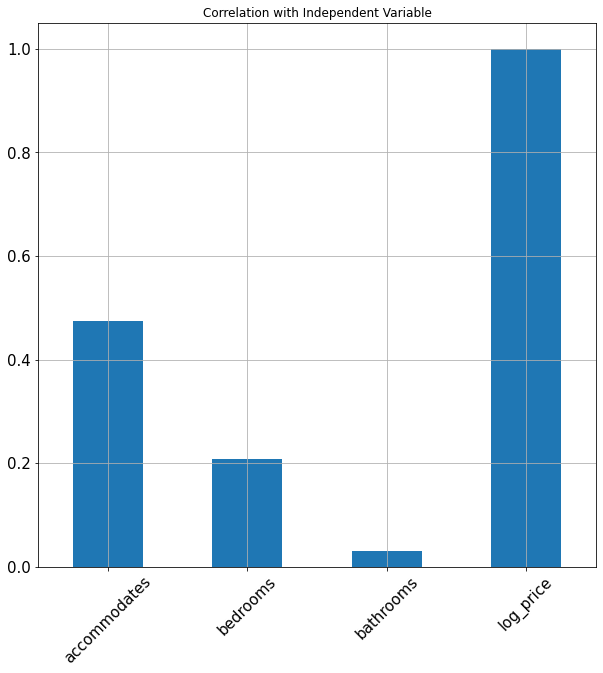

In [72]:
# Correlation with independent Variable (Note: Models like RF are not linear like these)
df_clean.corrwith(df_clean[label]).plot.bar(
        figsize = (10, 10), title = "Correlation with Independent Variable", fontsize = 15,
        rot = 45, grid = True)

In [73]:
#Show all correlation values
df_corr = df_clean.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')
# colour variable https://plotly.com/python/colorscales/
fig = px.imshow(df_corr_viz, text_auto=True, color_continuous_scale=[(0.00, "black"),   (0.33, "black"),
                                                     (0.33, "white"), (0.66, "white"),
                                                     (0.66, "blue"),  (1.00, "blue")])
fig.show()

In [74]:
df_clean.describe()

,accommodates,bedrooms,bathrooms,log_price
count,7799.000000,7799.000000,7799.000000,7799.000000
mean,2.651109,1.133863,1.091358,4.647971
std,1.377822,0.649170,0.307043,0.557102
min,1.000000,0.000000,0.000000,2.302585
25%,2.000000,1.000000,1.000000,4.248495
50%,2.000000,1.000000,1.000000,4.605170
75%,4.000000,1.000000,1.000000,5.068904
max,7.000000,8.000000,4.000000,5.805135


# **Pre-processing for ML Models**

In [75]:
df_clean.shape

(7799, 8)

In [76]:
#Define X and y
#X = df_clean.loc[:,california['feature_names']]
#y = df_clean.loc[:,'MEDV']

#X = df[numerical_features+non_numerical_features]
#y = df['target']
X = df_clean[features]
y = df_clean[label]
display ("Types of X and y need to be DF and Series", type(X),type(y))

'Types of X and y need to be DF and Series'

pandas.core.frame.DataFrame

pandas.core.series.Series

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# numeric_features = accomodates/bedrooms/bathrooms
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())] # returns higher accuracy
    #steps=[("scaler", StandardScaler())]
)

# categorical_features = neighbourhood_group/room_type/property_type
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ("numeric features", numeric_transformer, numerical_features)
        ,("categorical features", categorical_transformer, non_numerical_features)
    ],
    n_jobs=-1
)

NOTE: OneHotEncoder now requires handle_unknown parameter because testing dataset is so small it doesn't include every possible variable(s) example.  This is demonstrated in the unique values of X_train vs X_test.

In [78]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6239, 7), (1560, 7), (6239,), (1560,))

In [79]:
X_train.nunique(axis=0)

neighbourhood_group      5
neighbourhood          196
room_type                3
property_type            5
accommodates             7
bedrooms                 7
bathrooms                7
dtype: int64

In [80]:
X_test.nunique(axis=0)

neighbourhood_group      5
neighbourhood          148
room_type                3
property_type            4
accommodates             7
bedrooms                 6
bathrooms                7
dtype: int64

# Call Pipeline of Regression Models

In [82]:
#pd.set_option('display.expand_frame_repr', False)

In [105]:
pd.set_option('display.max_colwidth', 80)

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#define results dataframe to store results
results = pd.DataFrame([],
               columns = ['Model_Name', 'parameters', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

regressors = [
    KNeighborsRegressor(weights='uniform')
   ,KNeighborsRegressor(weights='distance')
   ,DecisionTreeRegressor(random_state=0)
   ,RandomForestRegressor(random_state=0)
   ,SVR()
   ,AdaBoostRegressor()
   ,GradientBoostingRegressor()
   ,LinearRegression()
   ]
for regressor in regressors:
    pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',regressor)
           ])
    model = pipeline.fit(X_train, y_train)
    
    model_name = str(regressor)
    # Predicting/Measuring Test Set
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    model_results = pd.DataFrame([[model_name, regressor, mae, mse, rmse, r2]],
    #model_results = pd.DataFrame([[model_name, '{:.3}%'.format(mae*100), '{:.3}%'.format(mse*100), '{:.3}%'.format(rmse*100), '{:.3}%'.format(r2*100)]],
                  columns = ['Model_Name','parameters', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
    results = results.append(model_results, ignore_index = True)
    print (model_name, "found R2 from training as", '{:.3}%'.format(model.score(X_train,y_train)*100), "vs testing of", '{:.3}%'.format(model.score(X_test,y_test)*100))



KNeighborsRegressor() found R2 from training as 66.9% vs testing of 59.6%
KNeighborsRegressor(weights='distance') found R2 from training as 76.0% vs testing of 57.2%
DecisionTreeRegressor(random_state=0) found R2 from training as 78.6% vs testing of 54.4%
RandomForestRegressor(random_state=0) found R2 from training as 77.2% vs testing of 60.9%
SVR() found R2 from training as 67.7% vs testing of 64.8%
AdaBoostRegressor() found R2 from training as 48.6% vs testing of 47.5%
GradientBoostingRegressor() found R2 from training as 63.1% vs testing of 62.6%
LinearRegression() found R2 from training as 64.3% vs testing of 63.3%


In [114]:
#The best model
print ("Merged dataset results:")
display (results.sort_values(by='R2 Score', ascending=False)) # display nicer df output than print
# regression accuracy = R2

Merged dataset results:


,Model_Name,parameters,MAE,MSE,RMSE,R2 Score
4,SVR(),SVR(),0.251695,0.110194,0.331955,0.647615
7,LinearRegression(),LinearRegression(),0.261141,0.114850,0.338895,0.632727
6,GradientBoostingRegressor(),"([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n ...",0.267600,0.116913,0.341925,0.626129
3,RandomForestRegressor(random_state=0),"(DecisionTreeRegressor(max_features=1.0, random_state=209652396), DecisionTr...",0.265552,0.122377,0.349824,0.608656
0,KNeighborsRegressor(),KNeighborsRegressor(),0.271839,0.126278,0.355356,0.596182
1,KNeighborsRegressor(weights='distance'),KNeighborsRegressor(weights='distance'),0.278012,0.133726,0.365686,0.572362
2,DecisionTreeRegressor(random_state=0),DecisionTreeRegressor(random_state=0),0.283199,0.142550,0.377558,0.544144
5,AdaBoostRegressor(),"(DecisionTreeRegressor(max_depth=3, random_state=1432135114), DecisionTreeRe...",0.330517,0.171993,0.414720,0.449991


In [ ]:
# Set the style of the plot
plt.style.use('ggplot')

# Define the x-axis labels
labels = ['MAE', 'MSE', 'RMSE', 'R2 Score']

# Define the values for each model and metric
uniform = results.loc[0, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
distance = results.loc[1, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
dt = results.loc[2, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
rf = results.loc[3, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
svm = results.loc[4, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
adaboost = results.loc[5, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values
gb = results.loc[6, ['MAE', 'MSE', 'RMSE', 'R2 Score']].values

# Define the x- and y-axis values
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(20,6))
rects1 = ax.bar(x - 3*width/2, uniform, width, label='Uniform')
rects2 = ax.bar(x - width/2, distance, width, label='Distance')
rects3 = ax.bar(x + width/2, dt, width, label='Decision Tree')
rects4 = ax.bar(x + 3*width/2, rf, width, label='Random Forest')
rects5 = ax.bar(x + 5*width/2, svm, width, label='SVM')
rects6 = ax.bar(x + 7*width/2, adaboost, width, label='AdaBoost')
rects7 = ax.bar(x + 9*width/2, gb, width, label='Gradient Boosting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the value labels on the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)

plt.show()

In [ ]:
# Filter results dataframe to only include SVR model
svr_results = results[results['Model'].astype(str).str.contains('SVR')]

# Get R2 scores for SVR model
svr_r2_scores = svr_results['R2 Score'].values

# Get R2 scores for other models
other_r2_scores = results[~results['Model'].astype(str).str.contains('SVR')]['R2 Score'].values

# Create plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['SVR', 'Other Models'], [svr_r2_scores.mean(), other_r2_scores.mean()])
ax.set_title('R2 Score Comparison: SVR vs Other Models')
ax.set_ylabel('R2 Score')
plt.show()